#Importing Libraries and Loading Files

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data Science/Practice kaggle/Delhi's House Prediction/MagicBricks.csv")

In [ ]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [ ]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [ ]:
df.shape

(1259, 11)

# Handling Missing Values

In [ ]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

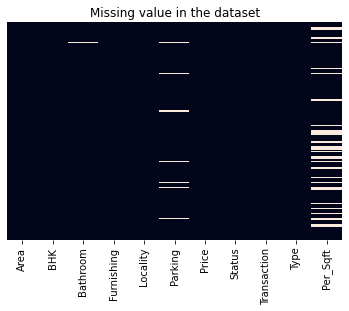

In [ ]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)
plt.title('Missing value in the dataset');

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [ ]:
missing_value_df.sort_values(by="percent_missing", ascending=False)

,column_name,percent_missing
Per_Sqft,Per_Sqft,19.142176
Parking,Parking,2.621128
Furnishing,Furnishing,0.397141
Type,Type,0.397141
Bathroom,Bathroom,0.158856
Area,Area,0.000000
BHK,BHK,0.000000
Locality,Locality,0.000000
Price,Price,0.000000
Status,Status,0.000000


**Observation -**
As we have very small dataset, So we can't delete the NAN values and we have 19% null values in Per_sqft , 2 % in Parking , approx 4 % in Furninshing and Type and 1.5 % in Bathroom.
We Will try not to drop columns , Let's see what can we do.

Let's Start with Per_Sqft

In [ ]:
df.Locality.value_counts()

Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  34
Lajpat Nagar 2                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
df[(df['Locality']=="DDA Flats Sarita Vihar, Sarita Vihar, Mathura Road")].head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
721,1200.0,10,4.0,Semi-Furnished,"DDA Flats Sarita Vihar, Sarita Vihar, Mathura ...",2.0,17000000,Ready_to_move,Resale,Apartment,NaN
723,1250.0,3,2.0,Semi-Furnished,"DDA Flats Sarita Vihar, Sarita Vihar, Mathura ...",2.0,16000000,Ready_to_move,Resale,Apartment,NaN
724,950.0,2,2.0,Furnished,"DDA Flats Sarita Vihar, Sarita Vihar, Mathura ...",2.0,12900000,Ready_to_move,Resale,Apartment,NaN
725,1200.0,3,3.0,Furnished,"DDA Flats Sarita Vihar, Sarita Vihar, Mathura ...",2.0,13500000,Ready_to_move,Resale,Apartment,NaN
726,1400.0,4,2.0,Furnished,"DDA Flats Sarita Vihar, Sarita Vihar, Mathura ...",2.0,17800000,Ready_to_move,Resale,Apartment,NaN


In [ ]:
df[(df['Locality']=="Lajpat Nagar 3")].head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
35,1450.0,3,3.0,Semi-Furnished,Lajpat Nagar 3,2.0,30000000,Ready_to_move,New_Property,Builder_Floor,NaN
42,1260.0,3,3.0,Semi-Furnished,Lajpat Nagar 3,1.0,21000000,Ready_to_move,Resale,Builder_Floor,NaN
50,2925.0,4,4.0,Unfurnished,Lajpat Nagar 3,2.0,57500000,Ready_to_move,New_Property,Builder_Floor,22000.0
52,1600.0,3,3.0,Unfurnished,Lajpat Nagar 3,2.0,30000000,Ready_to_move,New_Property,Builder_Floor,22000.0
55,1500.0,3,3.0,Semi-Furnished,Lajpat Nagar 3,1.0,31500000,Ready_to_move,Resale,Builder_Floor,22000.0


In [ ]:
per_sqft_null=df[df['Per_Sqft'].isna()]

In [ ]:
per_sqft_null.Locality.value_counts()

DDA Flats Sarita Vihar, Sarita Vihar, Mathura Road    19
Lajpat Nagar 3                                        14
Chhattarpur                                            9
Vasundhara Enclave                                     8
Mahavir Enclave Part 1                                 7
                                                      ..
Gold Croft Apartment, Aashirwaad Chowk, Dwarka         1
Ashirwad Apartments, Dwarka                            1
Paschimpuri, Paschim Vihar                             1
Paschim Vihar Block B2                                 1
Arya Chittaranjan Park, Chittaranjan Park              1
Name: Locality, Length: 110, dtype: int64

It will be best to drop Nan values in Per_Sqft 

In [ ]:
df.dropna(subset=['Per_Sqft'],inplace = True)

In [ ]:
df.isnull().sum()

Area            0
BHK             0
Bathroom        0
Furnishing      4
Locality        0
Parking        13
Price           0
Status          0
Transaction     0
Type            4
Per_Sqft        0
dtype: int64

Let's Try something in Furnishing, We have 4 Nan values. It's very small bt we have very small data so we will try not to drop it.

In [ ]:
furnishing_null=df[df['Furnishing'].isna()]

In [ ]:
furnishing_null

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
509,450.0,2,2.0,NaN,"Gandhi Nagar, Shahdara",NaN,2900000,Ready_to_move,Resale,NaN,58000.0
510,540.0,5,2.0,NaN,"Gandhi Nagar, Shahdara",NaN,17000000,Ready_to_move,Resale,NaN,58000.0
511,1350.0,3,3.0,NaN,"Gandhi Nagar, Shahdara",NaN,25000000,Ready_to_move,Resale,NaN,18519.0
512,2250.0,3,2.0,NaN,"Gandhi Nagar, Shahdara",NaN,10000000,Ready_to_move,Resale,NaN,4444.0


In [ ]:
df[(df['Locality']=="Gandhi Nagar, Shahdara")].head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
509,450.0,2,2.0,NaN,"Gandhi Nagar, Shahdara",NaN,2900000,Ready_to_move,Resale,NaN,58000.0
510,540.0,5,2.0,NaN,"Gandhi Nagar, Shahdara",NaN,17000000,Ready_to_move,Resale,NaN,58000.0
511,1350.0,3,3.0,NaN,"Gandhi Nagar, Shahdara",NaN,25000000,Ready_to_move,Resale,NaN,18519.0
512,2250.0,3,2.0,NaN,"Gandhi Nagar, Shahdara",NaN,10000000,Ready_to_move,Resale,NaN,4444.0


In [ ]:
df.dropna(subset=['Furnishing'],inplace = True)

I had to delete Nan values in Furnishing Because there were no relation between them ,so i can find a way to input values of Furnishing

In [ ]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        9
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [ ]:
Parking_null=df[df['Parking'].isna()]

In [ ]:
Parking_null

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
513,1250.0,2,1.0,Semi-Furnished,"DDA Flats Mansarovar Park, Seelampur, Shahdara",NaN,7500000,Ready_to_move,Resale,Apartment,4444.0
514,504.0,3,1.0,Semi-Furnished,"Seelampur, Shahdara",NaN,3600000,Ready_to_move,Resale,Apartment,7143.0
515,65.0,3,2.0,Semi-Furnished,"Shanti Mohalla, Shahdara",NaN,35000000,Ready_to_move,New_Property,Apartment,7143.0
516,450.0,2,1.0,Unfurnished,"Seelampur, Shahdara",NaN,6000000,Ready_to_move,Resale,Apartment,13333.0
517,1800.0,4,2.0,Furnished,"Rajgarh Colony, Shahdara",NaN,17500000,Ready_to_move,Resale,Builder_Floor,9722.0
518,1800.0,4,3.0,Furnished,"Kanti Nagar East, Shahdara",NaN,35000000,Ready_to_move,Resale,Builder_Floor,19444.0
519,1530.0,5,2.0,Furnished,"Raghubarpura, Shahdara",NaN,10200000,Ready_to_move,Resale,Builder_Floor,6667.0
659,3050.0,5,6.0,Semi-Furnished,Commonwealth Games Village 2010,NaN,62500000,Ready_to_move,Resale,Apartment,20492.0
811,675.0,2,1.0,Unfurnished,Mehrauli,NaN,2200000,Ready_to_move,Resale,Builder_Floor,3259.0


In [ ]:
df[df.Locality.str.contains("Shahdara")].head(60)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
305,1425.0000,3,3.0,Semi-Furnished,"Naveen Shahdara, Shahdara",1.0,9300000,Ready_to_move,Resale,Builder_Floor,6526.0
306,440.0000,2,2.0,Unfurnished,Shahdara,1.0,2700000,Ready_to_move,Resale,Apartment,6526.0
307,1017.0000,2,2.0,Furnished,"Vishwas Nagar, Shahdara",1.0,6500000,Ready_to_move,New_Property,Builder_Floor,6526.0
308,650.0000,2,2.0,Semi-Furnished,"DDA RPS Flats, Mansarowar Park, Shahdara",1.0,5800000,Ready_to_move,Resale,Apartment,6526.0
309,950.0000,3,2.0,Semi-Furnished,Shahdara,1.0,5500000,Ready_to_move,Resale,Apartment,6526.0
310,810.0000,3,2.0,Semi-Furnished,"Yamuna Vihar, Shahdara",1.0,6000000,Ready_to_move,Resale,Builder_Floor,6526.0
311,750.0000,2,2.0,Unfurnished,"Balbir Nagar, Shahdara",1.0,4500000,Ready_to_move,Resale,Builder_Floor,6526.0
312,990.0000,2,2.0,Semi-Furnished,Shahdara,2.0,4100000,Ready_to_move,Resale,Builder_Floor,6526.0
313,800.0000,3,2.0,Semi-Furnished,"Ram Nagar, Shahdara",2.0,3800000,Ready_to_move,Resale,Builder_Floor,6526.0
314,675.0000,2,1.0,Unfurnished,Shahdara,1.0,3300000,Ready_to_move,Resale,Apartment,6526.0


In [ ]:
df[444:500]

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
505,1550.0000,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,13000000,Ready_to_move,New_Property,Builder_Floor,30556.0
506,1600.0000,3,3.0,Semi-Furnished,Greater Kailash 1,1.0,30000000,Ready_to_move,New_Property,Builder_Floor,18750.0
507,700.0000,2,2.0,Semi-Furnished,"Khanpur, Madangir",1.0,2400000,Ready_to_move,New_Property,Builder_Floor,18750.0
508,45.0000,4,3.0,Unfurnished,"Batla House, Okhla",1.0,5500000,Ready_to_move,New_Property,Builder_Floor,18750.0
513,1250.0000,2,1.0,Semi-Furnished,"DDA Flats Mansarovar Park, Seelampur, Shahdara",NaN,7500000,Ready_to_move,Resale,Apartment,4444.0
514,504.0000,3,1.0,Semi-Furnished,"Seelampur, Shahdara",NaN,3600000,Ready_to_move,Resale,Apartment,7143.0
515,65.0000,3,2.0,Semi-Furnished,"Shanti Mohalla, Shahdara",NaN,35000000,Ready_to_move,New_Property,Apartment,7143.0
516,450.0000,2,1.0,Unfurnished,"Seelampur, Shahdara",NaN,6000000,Ready_to_move,Resale,Apartment,13333.0
517,1800.0000,4,2.0,Furnished,"Rajgarh Colony, Shahdara",NaN,17500000,Ready_to_move,Resale,Builder_Floor,9722.0
518,1800.0000,4,3.0,Furnished,"Kanti Nagar East, Shahdara",NaN,35000000,Ready_to_move,Resale,Builder_Floor,19444.0


In Majority Value of Parking nan values is from Shahdra and in shahdra there are mostly 1 parking , So i am replacing nan values with 1.

In [ ]:
df['Parking'] = df['Parking'].fillna("1.0")

In [ ]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

We have Done with Missing Values

#EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


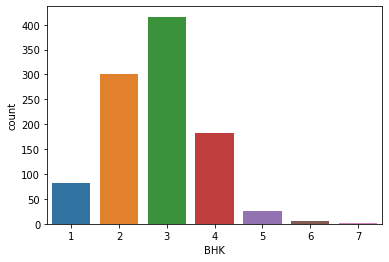

In [ ]:
sns.countplot(df['BHK'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


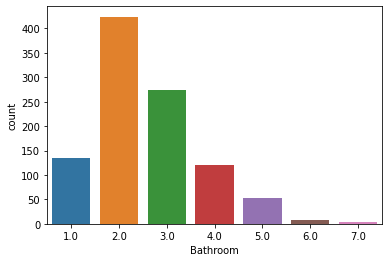

In [ ]:
sns.countplot(df['Bathroom'])

In [ ]:
df['BHK'].value_counts()

3    416
2    300
4    183
1     82
5     26
6      6
7      1
Name: BHK, dtype: int64

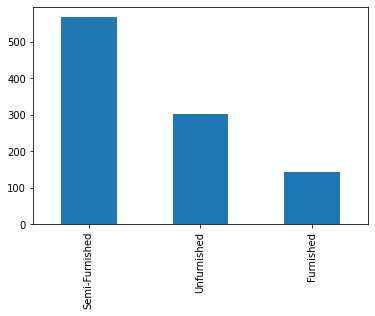

In [ ]:
df.Furnishing.value_counts().plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


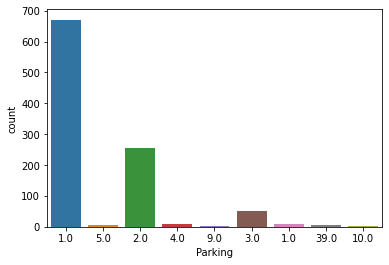

In [ ]:
sns.countplot(df.Parking)

In [ ]:
df.Parking.value_counts()

1.0     671
2.0     256
3.0      52
4.0      10
1.0       9
5.0       7
39.0      7
9.0       1
10.0      1
Name: Parking, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


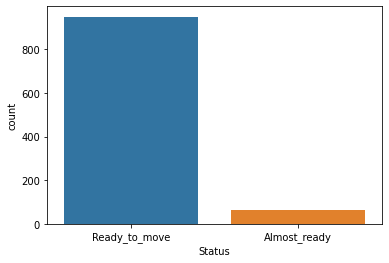

In [ ]:
sns.countplot(df.Status)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


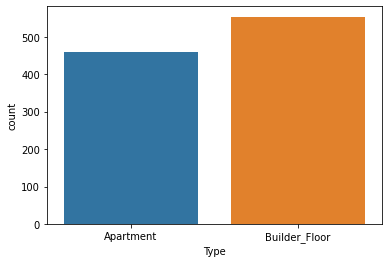

In [ ]:
sns.countplot(df.Type)

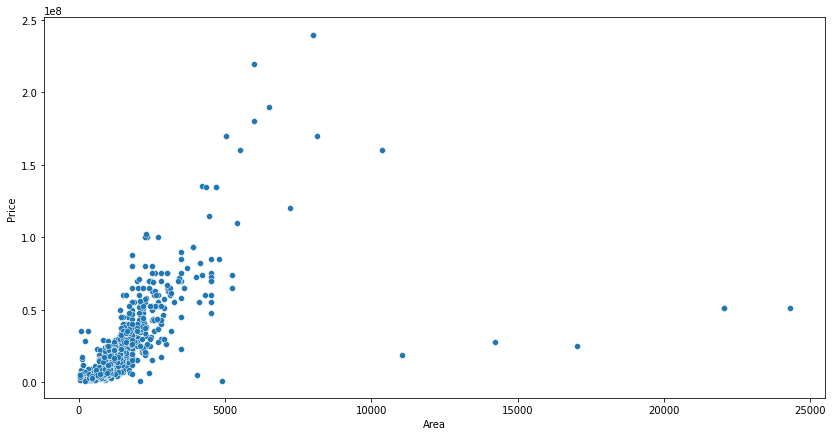

In [ ]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=df.Area,y=df.Price)

**Observations**

1.There are outliers in many columns

2.There are linear relationship between Price and Area.

3.There is some error in Parking as it is not possible to have 39 parkings, So we will work on it.


#Outliers

In [ ]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

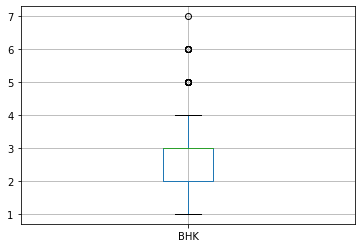

In [ ]:
df.boxplot("BHK")

In [ ]:
Q1 = df["BHK"].quantile(0.25)
Q3 = df["BHK"].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df["BHK"] < (Q1 - 1.5 * IQR)) |(df["BHK"] > (Q3 + 1.5 * IQR)))]

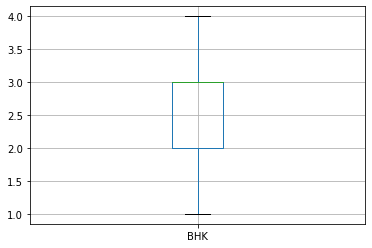

In [ ]:
df.boxplot("BHK")

In [ ]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [ ]:
df['BHK'].value_counts()

3    416
2    300
4    183
1     82
Name: BHK, dtype: int64

In [ ]:
df['Parking'] = pd.to_numeric(df['Parking'], downcast='unsigned', errors='coerce')

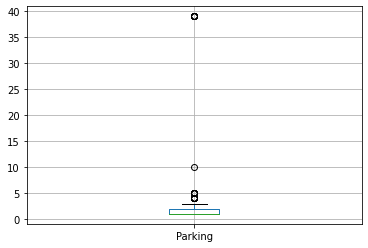

In [ ]:
df.boxplot("Parking")

In [ ]:
df.Parking.value_counts()

1     662
2     253
3      43
4       8
5       7
39      7
10      1
Name: Parking, dtype: int64

39 Parking is outlier, We will have to remove it.

In [ ]:
Q1 = df["Parking"].quantile(0.25)
Q3 = df["Parking"].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df["Parking"] < (Q1 - 9 * IQR)) |(df["Parking"] > (Q3 + 9 * IQR)))]

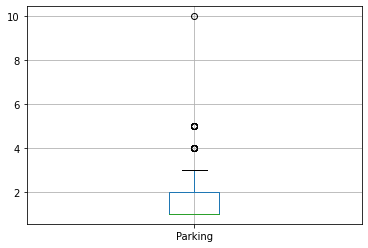

In [ ]:
df.boxplot("Parking")

#Feature Selection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 1 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         974 non-null    float64
 1   BHK          974 non-null    int64  
 2   Bathroom     974 non-null    float64
 3   Furnishing   974 non-null    object 
 4   Locality     974 non-null    object 
 5   Parking      974 non-null    uint8  
 6   Price        974 non-null    int64  
 7   Status       974 non-null    object 
 8   Transaction  974 non-null    object 
 9   Type         974 non-null    object 
 10  Per_Sqft     974 non-null    float64
dtypes: float64(3), int64(2), object(5), uint8(1)
memory usage: 84.7+ KB


In [ ]:
objList = df.select_dtypes(include = "object").columns 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))
print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 1 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         974 non-null    float64
 1   BHK          974 non-null    int64  
 2   Bathroom     974 non-null    float64
 3   Furnishing   974 non-null    int64  
 4   Locality     974 non-null    int64  
 5   Parking      974 non-null    uint8  
 6   Price        974 non-null    int64  
 7   Status       974 non-null    int64  
 8   Transaction  974 non-null    int64  
 9   Type         974 non-null    int64  
 10  Per_Sqft     974 non-null    float64
dtypes: float64(3), int64(7), uint8(1)
memory usage: 84.7 KB
None


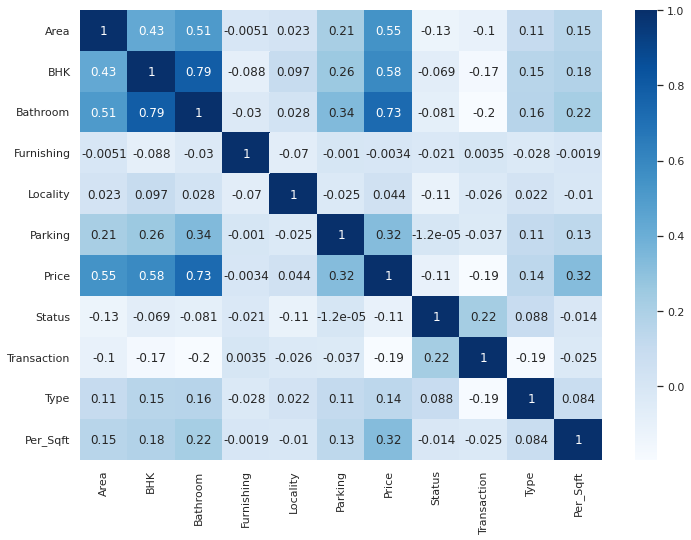

In [ ]:
corr = df.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.heatmap(corr, cmap="Blues", annot=True)

1.We Have to remove Locality becuase it is very messy and have only 4% of correlation with Price.

2.Furnishing also have only 0.7% of correlation. We wil have to remove it.

In [ ]:
df.drop(columns=['Locality', 'Furnishing'])

,Area,BHK,Bathroom,Parking,Price,Status,Transaction,Type,Per_Sqft
1,750.0,2,2.0,1,5000000,1,0,0,6667.0
2,950.0,2,2.0,1,15500000,1,1,0,6667.0
3,600.0,2,2.0,1,4200000,1,1,1,6667.0
4,650.0,2,2.0,1,6200000,1,0,1,6667.0
5,1300.0,4,3.0,1,15500000,1,0,1,6667.0
...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,3,55000000,1,0,1,12916.0
1255,1050.0,3,2.0,3,12500000,1,1,1,12916.0
1256,875.0,3,3.0,3,17500000,1,0,1,12916.0
1257,990.0,2,2.0,1,11500000,1,1,1,12916.0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

# Apply Models

In [ ]:
from sklearn.model_selection import train_test_split
Y = df.Price
X = df.drop('Price',axis=1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
y_pred

array([ 4.91127149e+07,  2.88782213e+07,  3.82164701e+07,  1.71390087e+07,
        9.43071533e+06,  1.27696712e+08,  1.34251972e+07, -2.72935740e+06,
       -4.72262871e+06,  9.43715343e+06,  4.93148602e+07,  1.13245683e+07,
        2.87882038e+07,  2.24372950e+07,  4.01965960e+07,  1.31592228e+06,
        5.82860354e+07,  2.72712630e+07,  1.76196802e+07,  6.79930127e+06,
        2.79361429e+07,  1.42997533e+07,  2.47664610e+07,  3.28981647e+07,
        1.32598613e+07,  2.03285466e+07,  1.21978093e+07,  3.78215440e+07,
        4.08805274e+05,  3.98794093e+07,  8.93283809e+06,  2.60021568e+07,
       -5.56494905e+06,  3.27038596e+07,  1.04551049e+07, -4.43036637e+06,
        1.03711409e+07,  1.22972472e+07,  3.80801253e+07,  2.81772521e+07,
       -3.98978774e+06,  2.90797795e+07,  7.00940845e+06,  1.01642688e+07,
       -4.18895241e+06,  1.51317558e+07,  2.56170792e+07, -7.75011594e+06,
        3.09245006e+07,  1.04551049e+07,  3.41232684e+07,  2.44552654e+07,
        7.56441582e+07,  

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4649585047475846

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=100,random_state=25)

In [ ]:
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=25)

In [ ]:
y_pred1=rf.predict(x_test)

In [ ]:
y_pred1

array([3.22640000e+07, 3.33320000e+07, 5.57920000e+07, 2.51810000e+07,
       4.08300000e+06, 7.58100000e+07, 2.26332000e+07, 2.64900000e+06,
       2.89310000e+06, 6.55190000e+06, 4.45450000e+07, 1.62000000e+07,
       3.23030000e+07, 2.39918000e+07, 4.33110000e+07, 3.06240000e+06,
       3.34200000e+07, 2.11888000e+07, 4.37820000e+06, 7.89870000e+06,
       3.07250000e+07, 1.26081000e+07, 1.29490000e+07, 2.37980000e+07,
       5.36400000e+06, 2.95080000e+07, 9.30390000e+06, 2.74849000e+07,
       2.30040000e+07, 6.24415000e+07, 7.37500000e+06, 1.92150000e+07,
       2.05030000e+06, 5.00660000e+07, 5.10250000e+06, 4.57000000e+06,
       1.75816667e+07, 1.38707000e+07, 3.04280000e+07, 1.95660000e+07,
       3.08890000e+06, 2.68400000e+07, 3.20220000e+06, 6.72500000e+06,
       1.83970000e+06, 2.19240000e+07, 1.82330000e+07, 2.43990000e+06,
       2.26500000e+07, 5.10250000e+06, 1.27916000e+07, 1.80138333e+07,
       1.13867500e+08, 2.52400000e+07, 2.39760000e+07, 3.02540000e+06,
      

In [ ]:
r2_score(y_test,y_pred1) 

0.7220004817236853

### **Random Forest is giving best result.**